Model loaded.

Processing: S2_Guwahati_Apr2023_B2B3B4B8.tif
Cloud cover = 14.81%


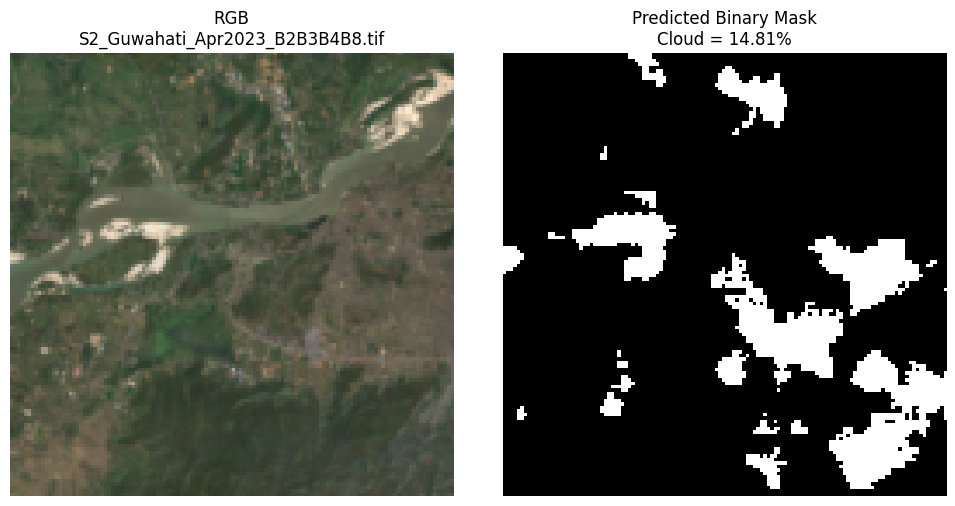


Processing: S2_Guwahati_Apr2024.tif
Cloud cover = 27.01%


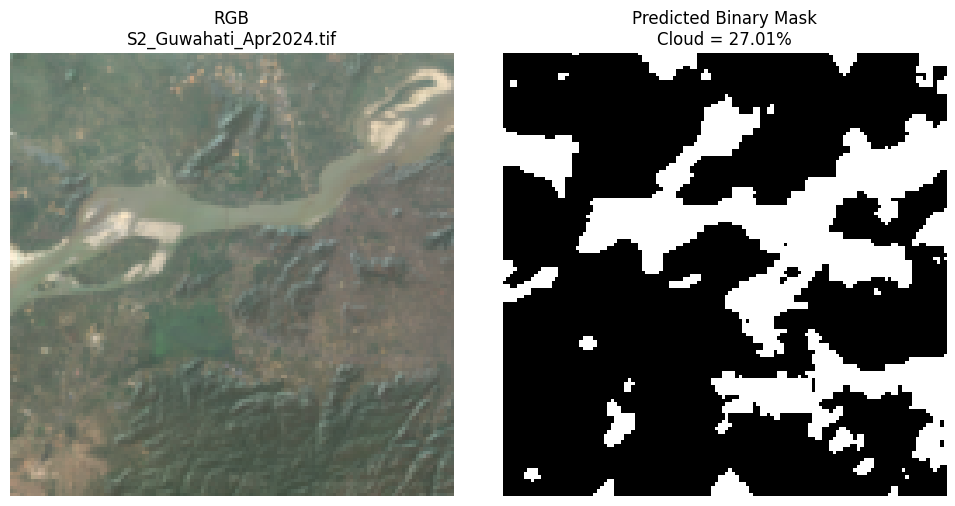


Processing: S2_Guwahati_Aug2021_B2B3B4B8.tif
Cloud cover = 87.98%


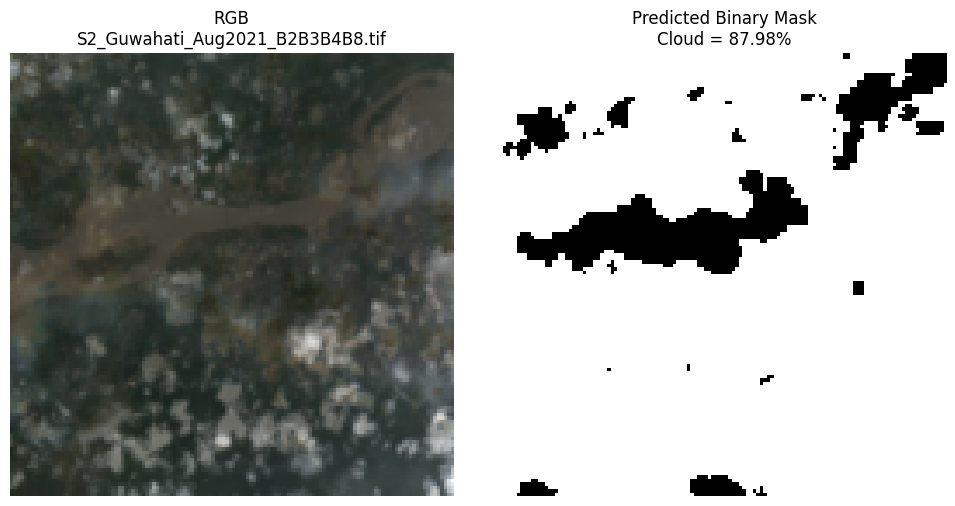


Processing: S2_Guwahati_Aug2022_B2B3B4B8.tif
Cloud cover = 94.23%


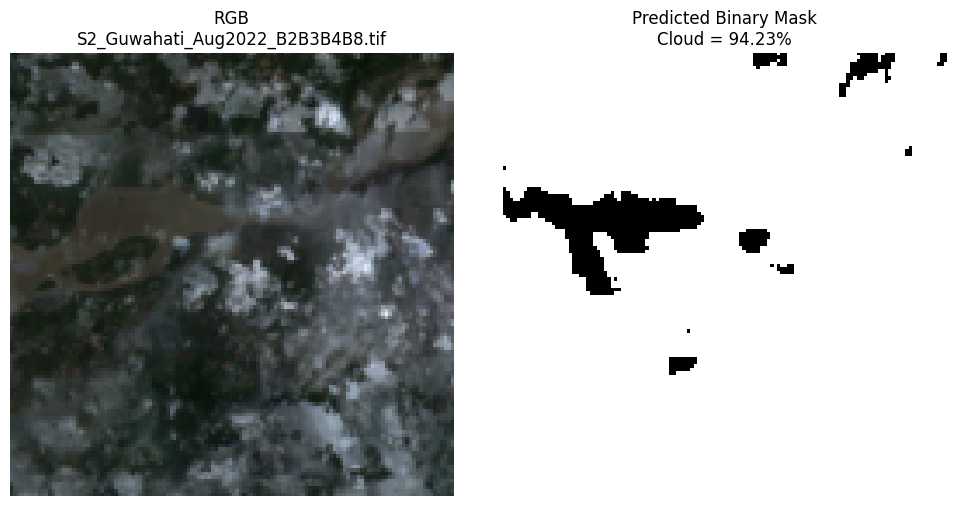


Processing: S2_Guwahati_Aug2023_B2B3B4B8.tif
Cloud cover = 83.95%


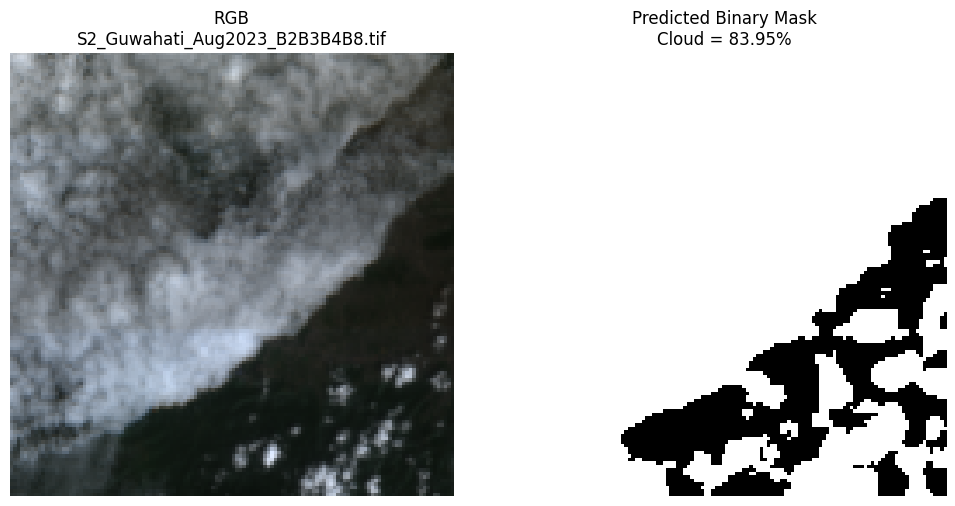


Processing: S2_Guwahati_Aug2024.tif
Cloud cover = 56.70%


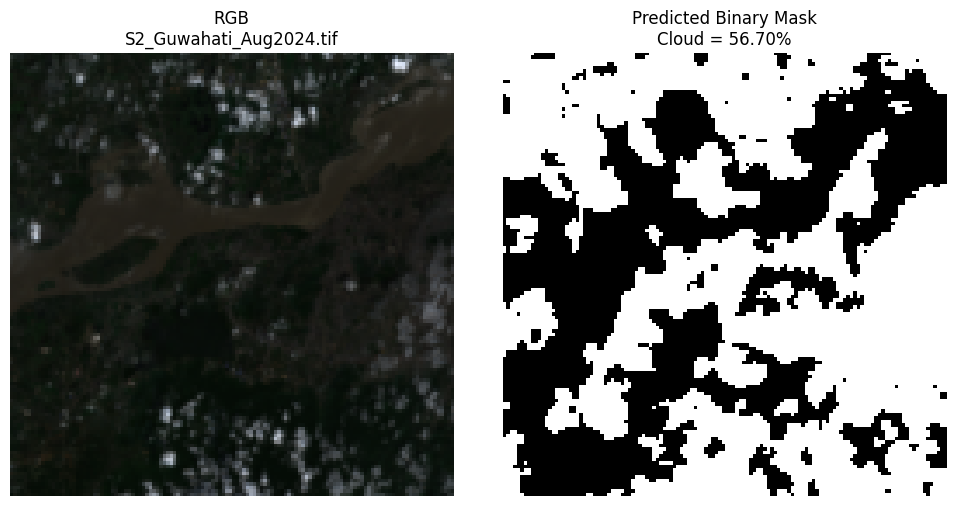


Processing: S2_Guwahati_Dec2021_B2B3B4B8.tif
Cloud cover = 23.57%


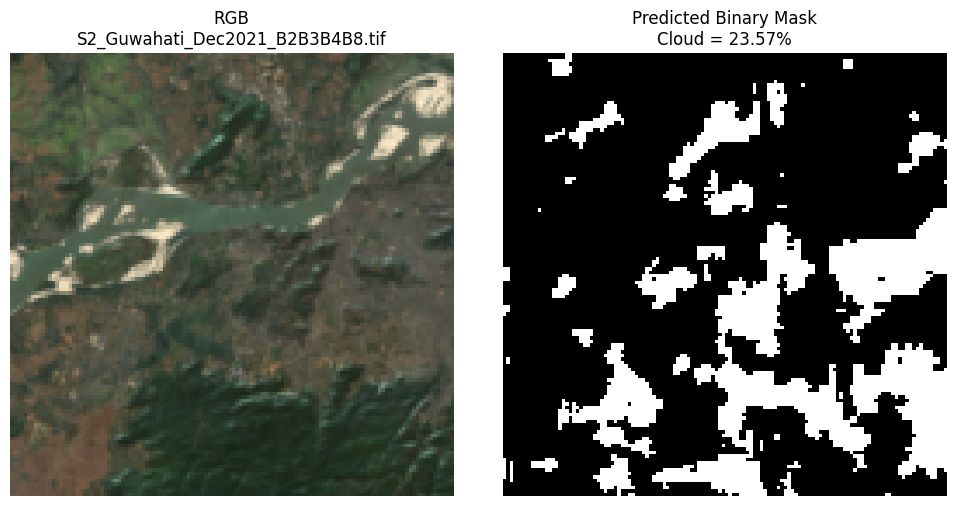


Processing: S2_Guwahati_Dec2022_B2B3B4B8.tif
Cloud cover = 22.74%


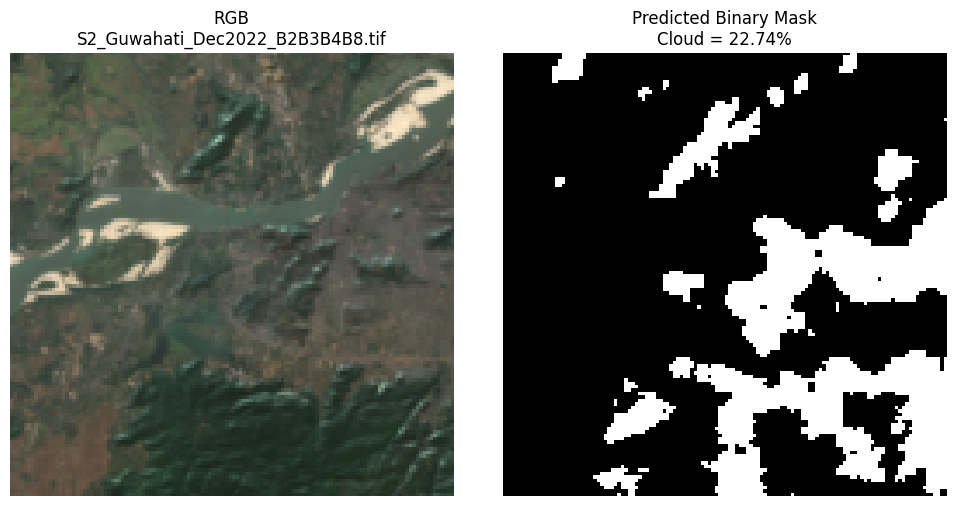


Processing: S2_Guwahati_Dec2023_B2B3B4B8.tif
Cloud cover = 23.85%


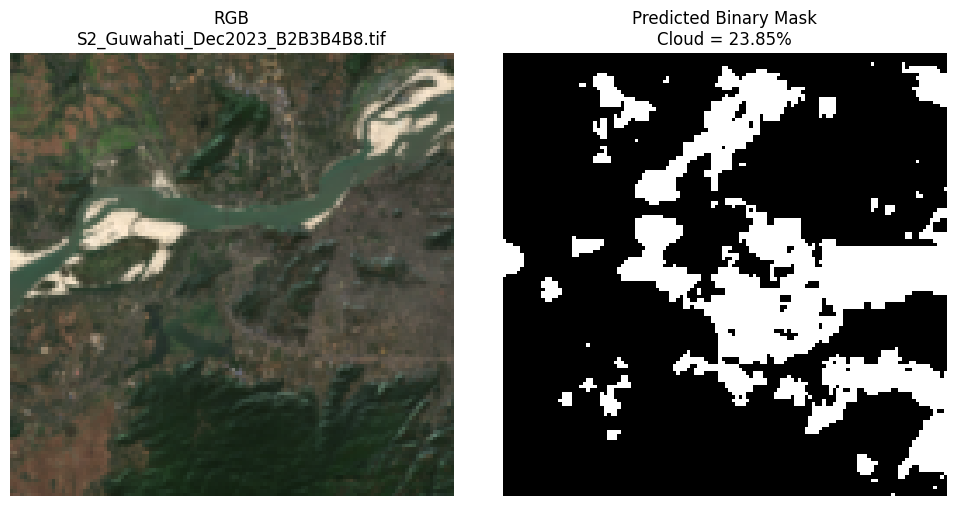


Processing: S2_Guwahati_Dec2024.tif
Cloud cover = 30.47%


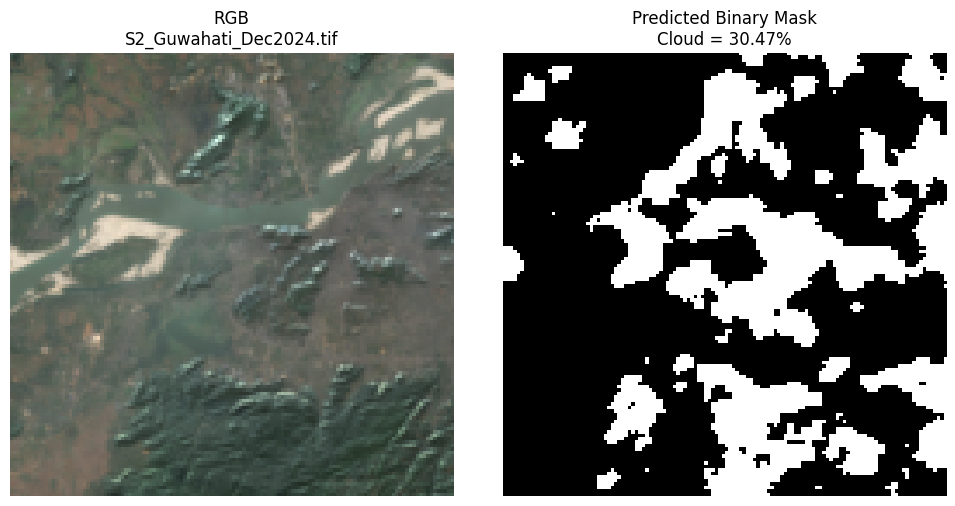


Processing: S2_Guwahati_Feb2021_B2B3B4B8.tif
Cloud cover = 61.60%


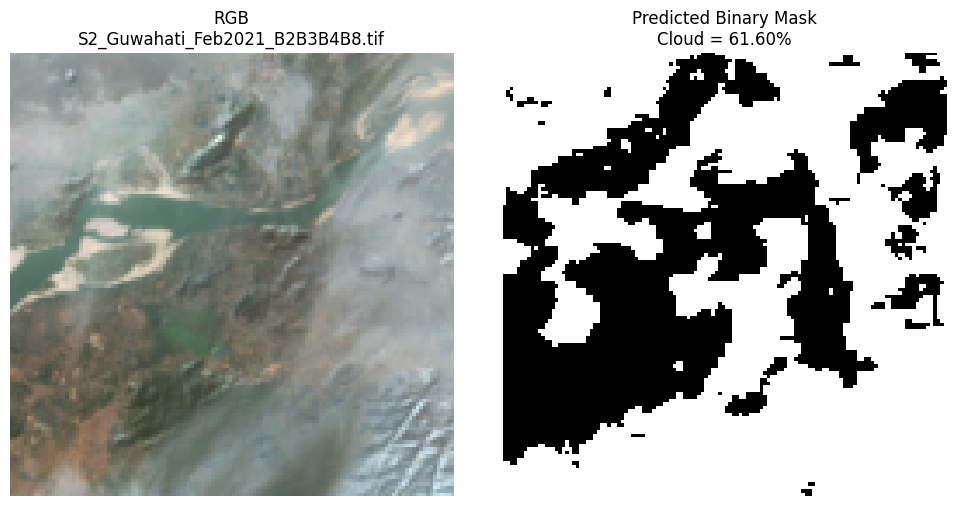


Processing: S2_Guwahati_Feb2022_B2B3B4B8.tif
Cloud cover = 96.31%


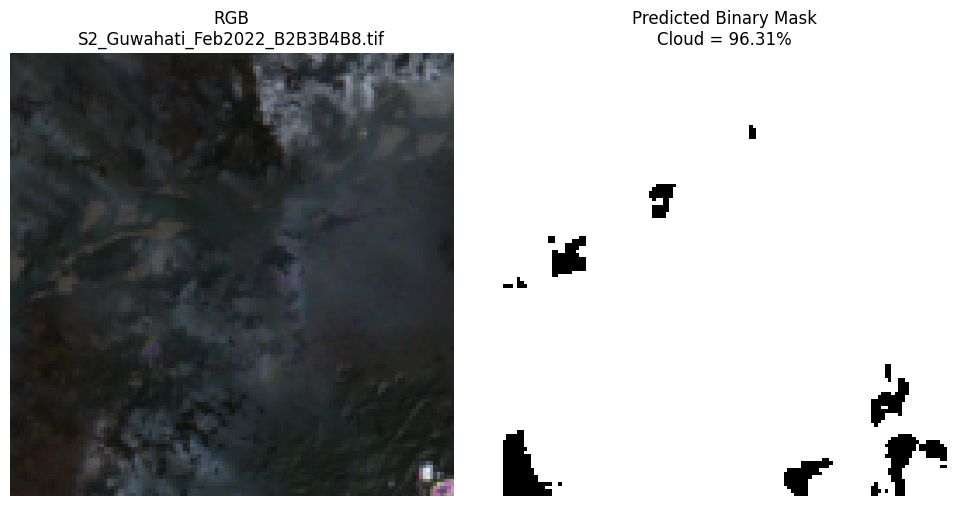


Processing: S2_Guwahati_Feb2023_B2B3B4B8.tif
Cloud cover = 42.86%


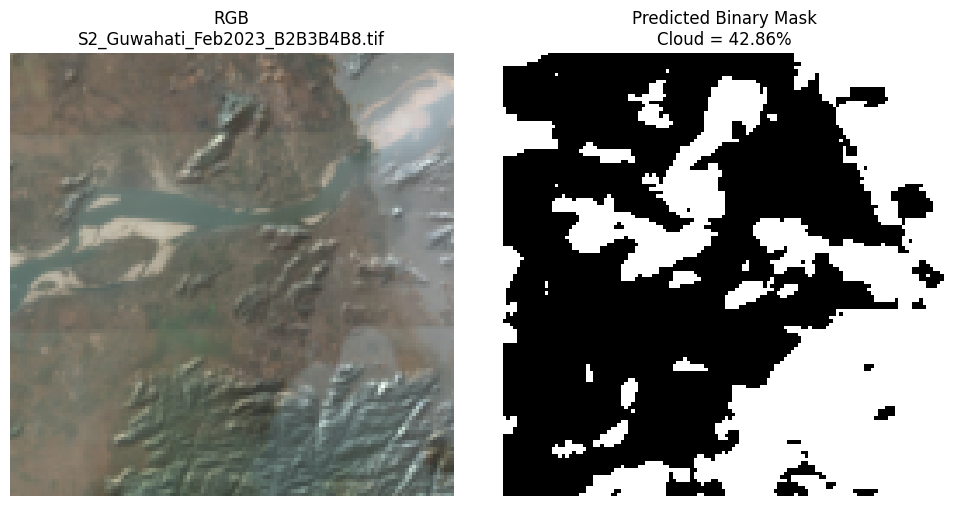


Processing: S2_Guwahati_Feb2024.tif
Cloud cover = 91.86%


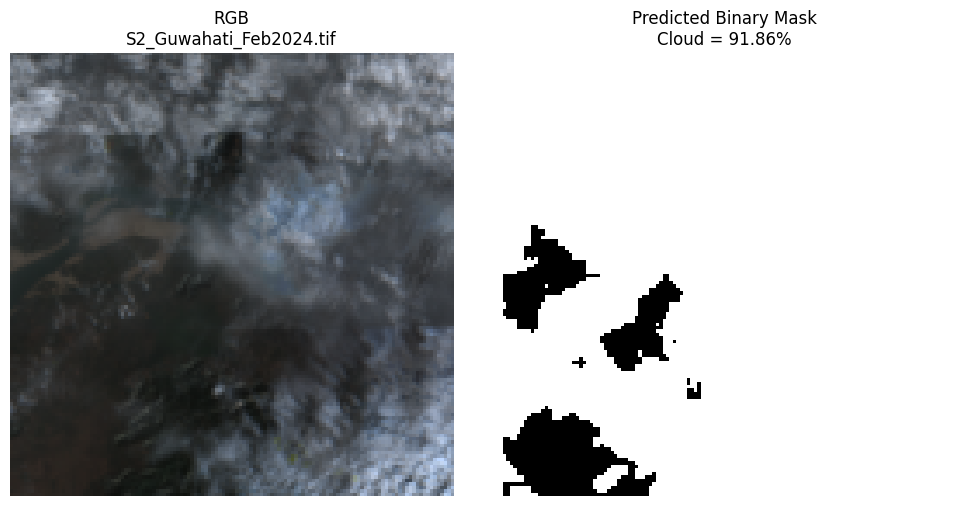


Processing: S2_Guwahati_Jan2021_B2B3B4B8.tif
Cloud cover = 54.83%


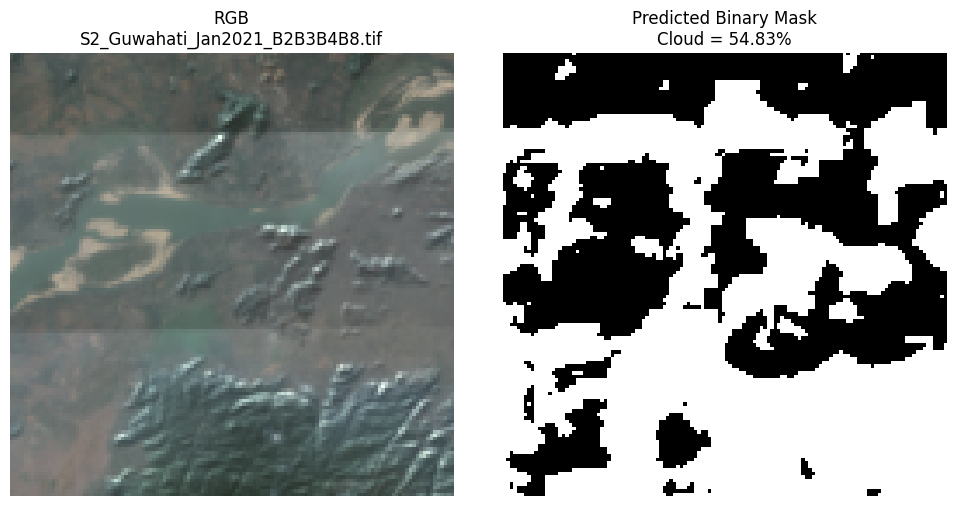


Processing: S2_Guwahati_Jan2022_B2B3B4B8(1).tif
Cloud cover = 100.00%


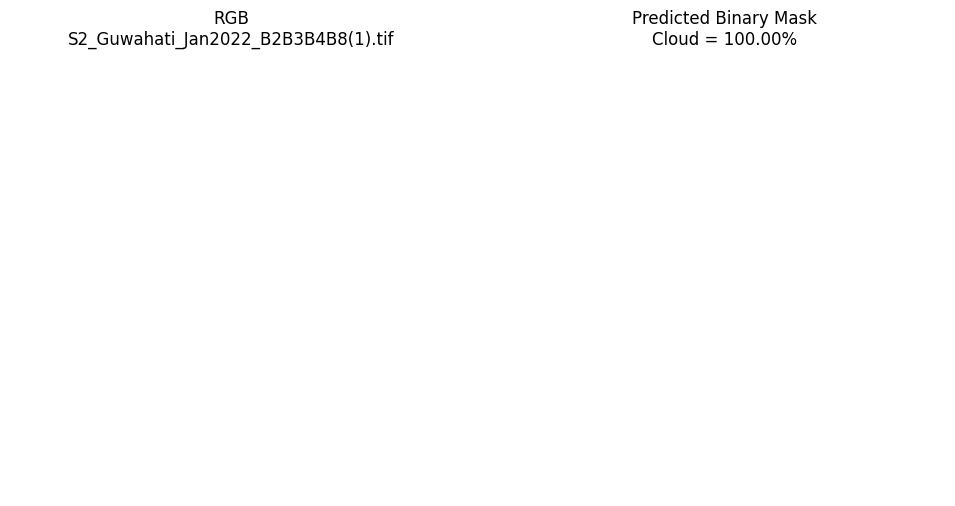


Processing: S2_Guwahati_Jan2022_B2B3B4B8.tif
Cloud cover = 55.11%


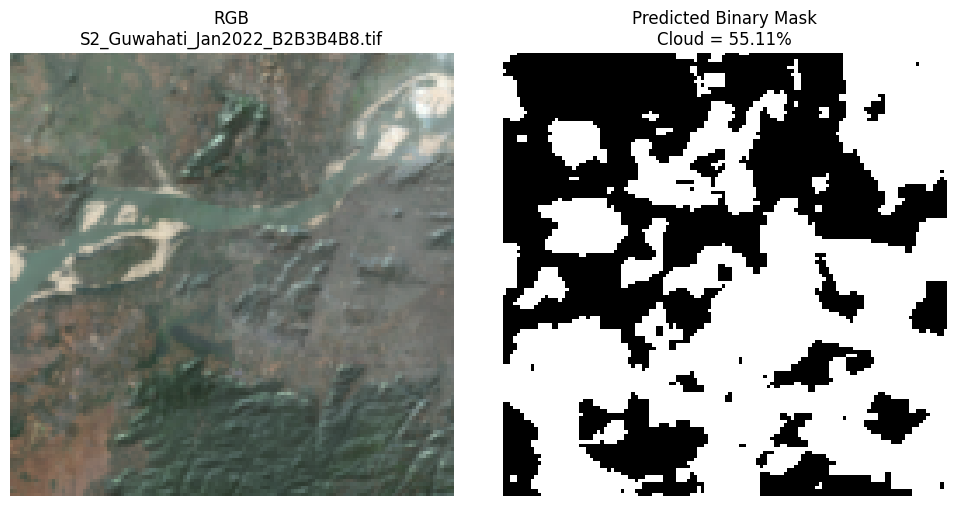


Processing: S2_Guwahati_Jan2022_B2B3B4B8_allbands.tif
Cloud cover = 100.00%


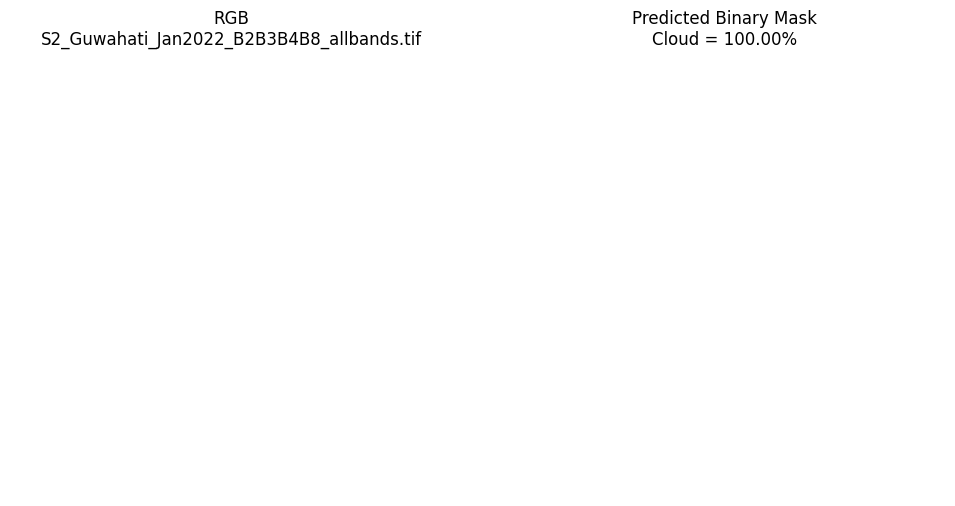


Processing: S2_Guwahati_Jan2022_B2B3B4B8_fixed.tif
Cloud cover = 57.85%


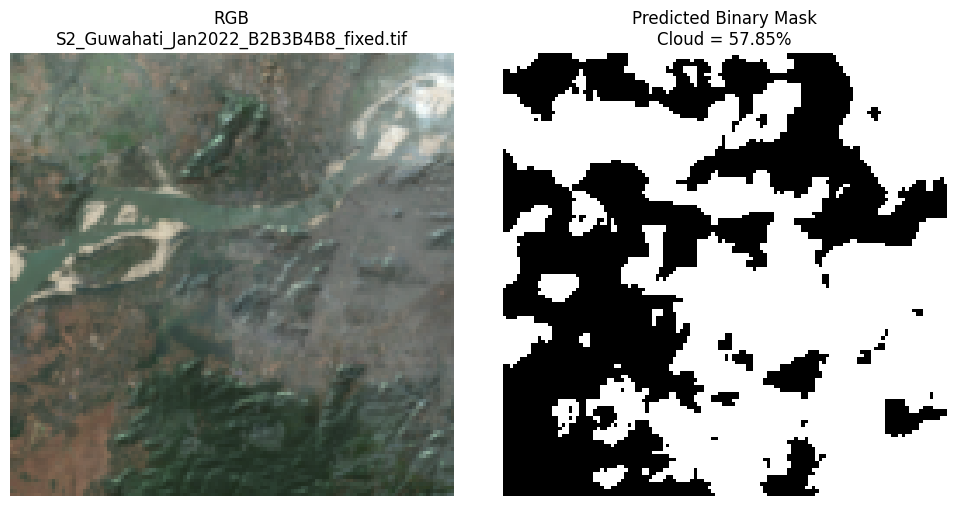


Processing: S2_Guwahati_Jan2023_B2B3B4B8.tif
Cloud cover = 20.70%


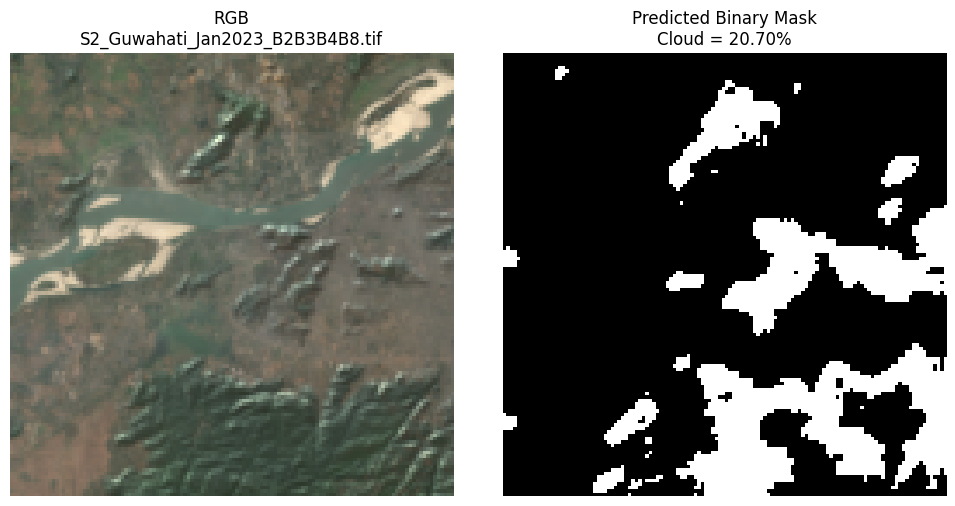


Processing: S2_Guwahati_Jan2024.tif
Cloud cover = 69.29%


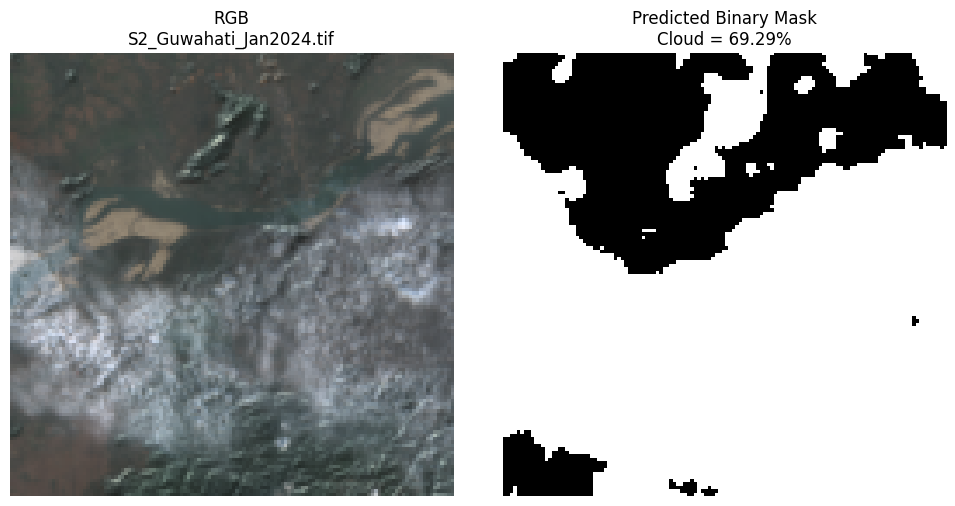


Processing: S2_Guwahati_Jul2021_B2B3B4B8.tif
Cloud cover = 90.46%


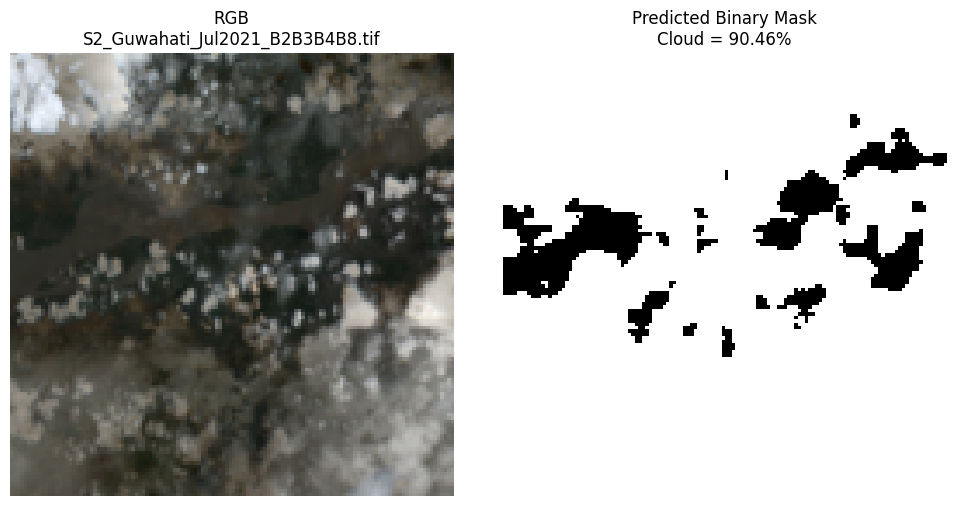


Processing: S2_Guwahati_Jul2022_B2B3B4B8.tif
Cloud cover = 91.46%


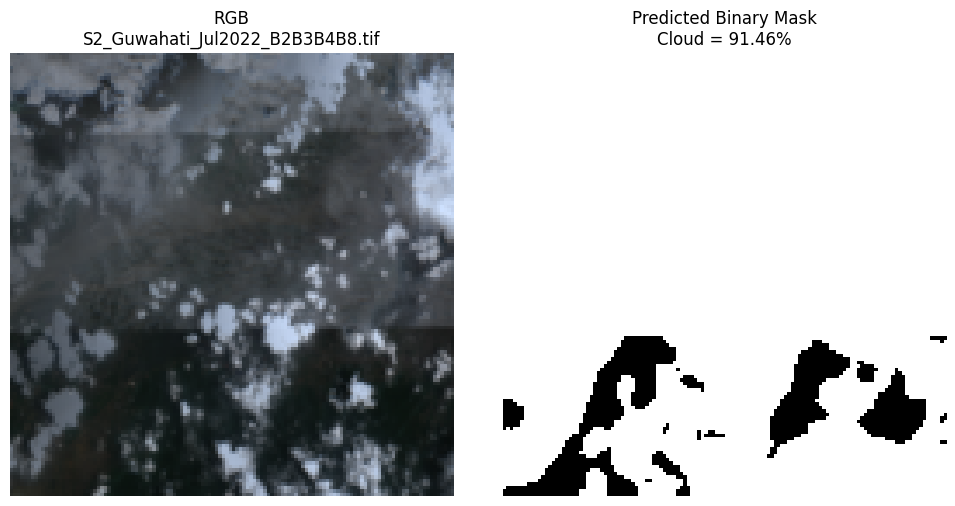


Processing: S2_Guwahati_Jul2023_B2B3B4B8.tif
Cloud cover = 85.42%


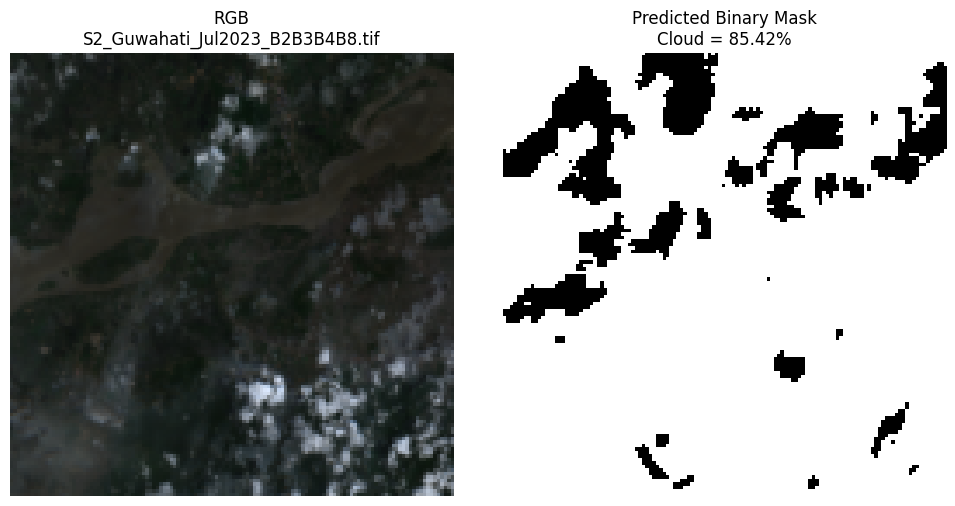


Processing: S2_Guwahati_Jul2024.tif
Cloud cover = 73.99%


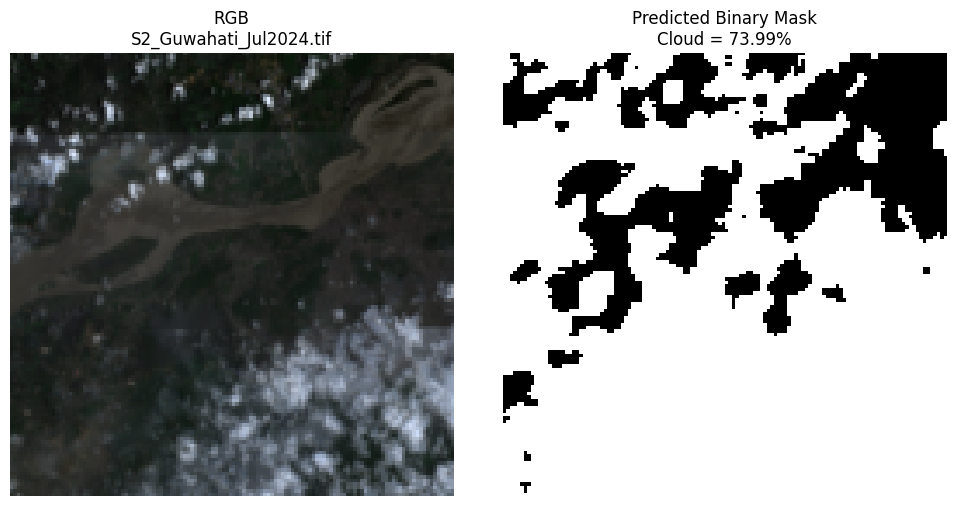


Processing: S2_Guwahati_Jun2021_B2B3B4B8.tif
Cloud cover = 90.25%


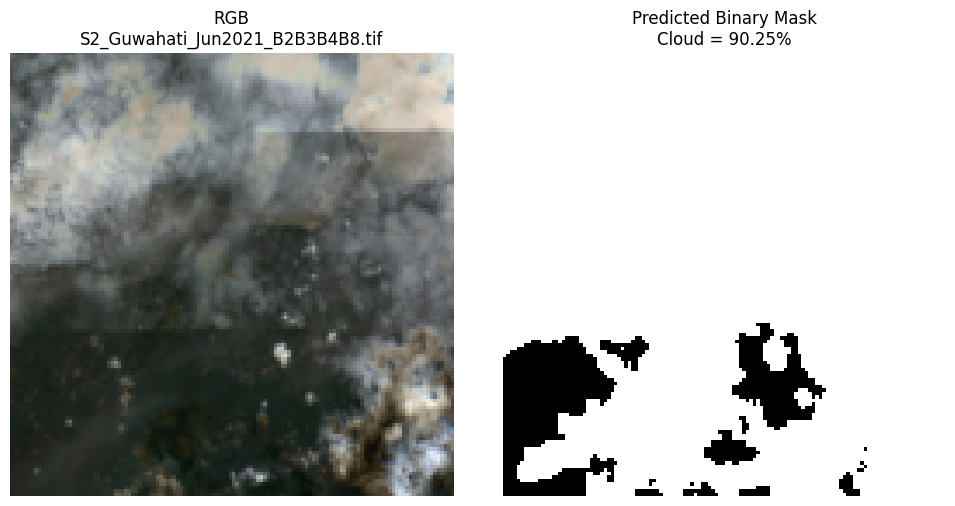


Processing: S2_Guwahati_Jun2023_B2B3B4B8.tif
Cloud cover = 39.81%


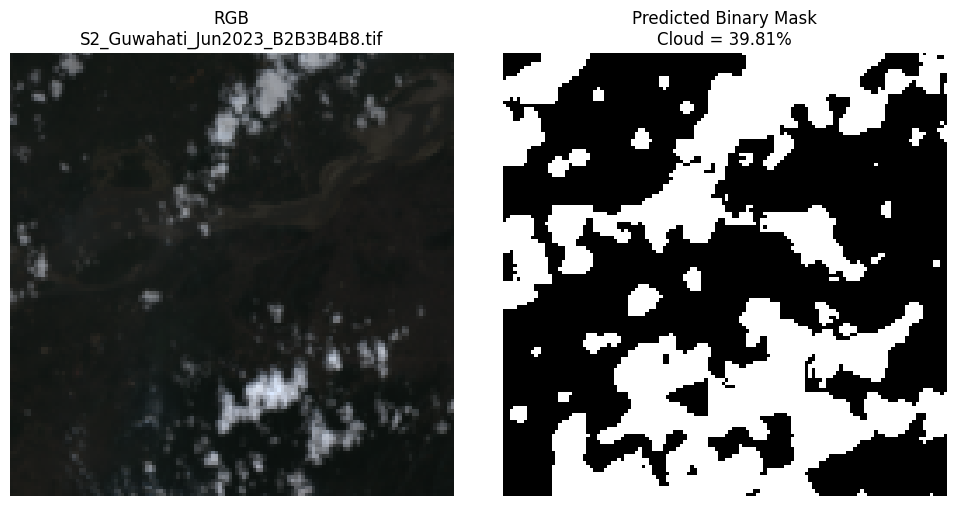


Processing: S2_Guwahati_Jun2024.tif
Cloud cover = 36.12%


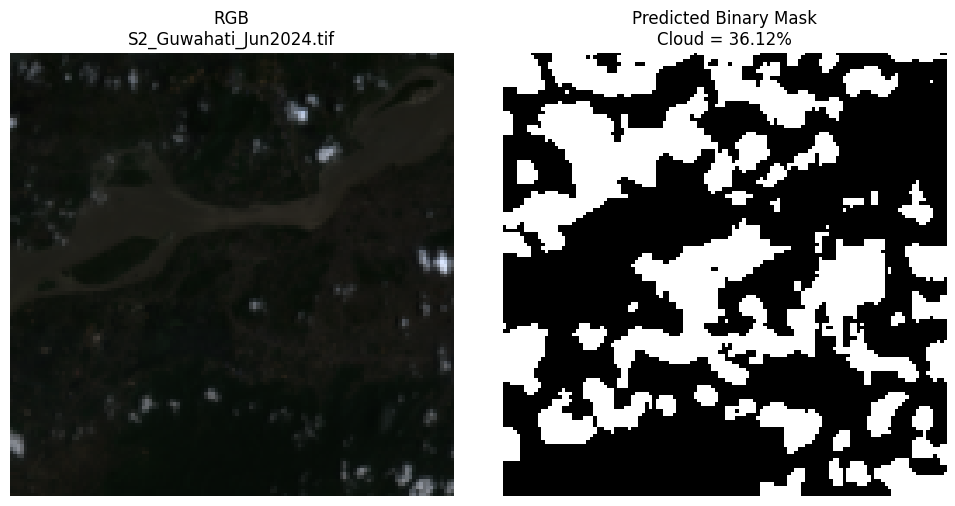


Processing: S2_Guwahati_Mar2021_B2B3B4B8.tif
Cloud cover = 11.75%


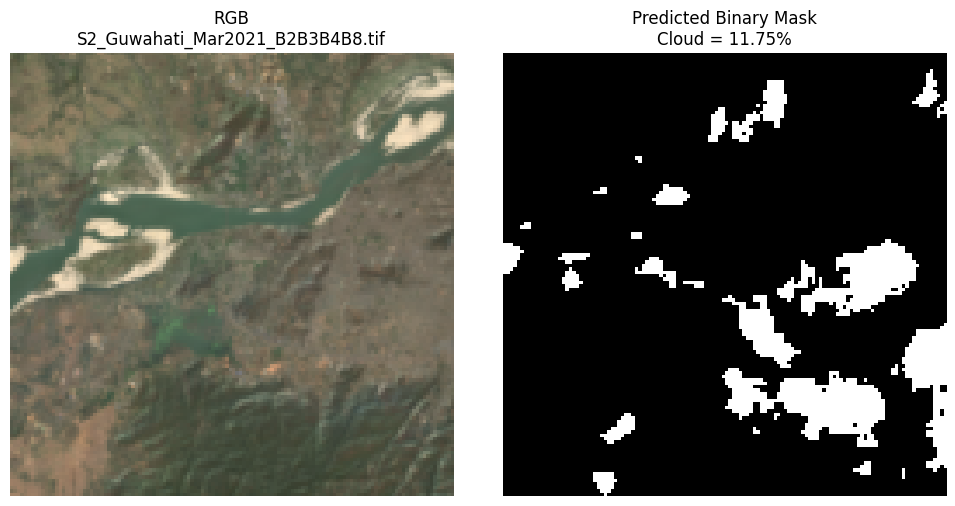


Processing: S2_Guwahati_Mar2022_B2B3B4B8.tif
Cloud cover = 10.82%


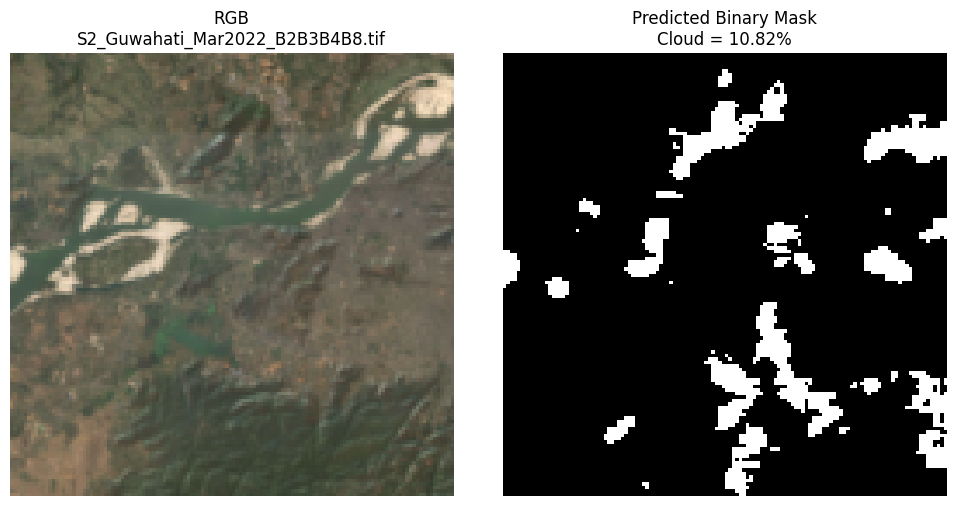


Processing: S2_Guwahati_Mar2023_B2B3B4B8.tif
Cloud cover = 28.92%


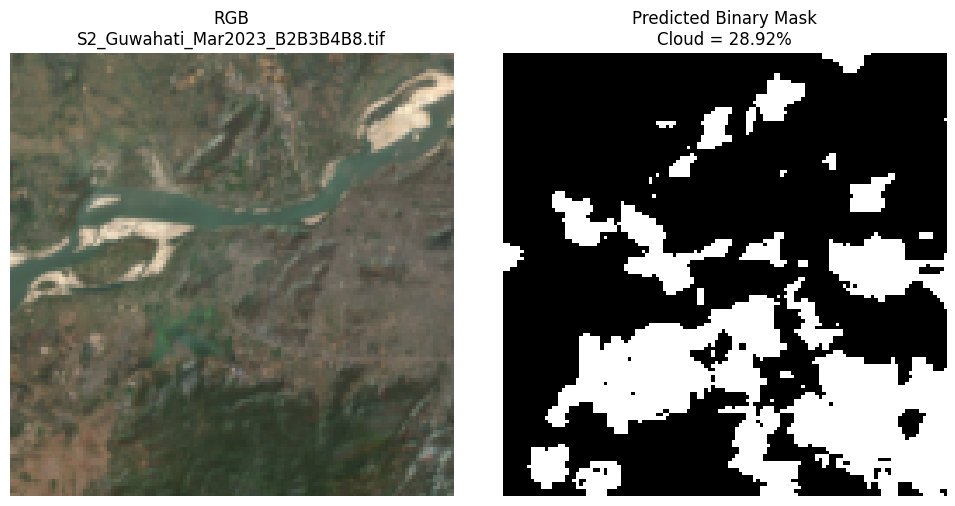


Processing: S2_Guwahati_Mar2024.tif
Cloud cover = 11.88%


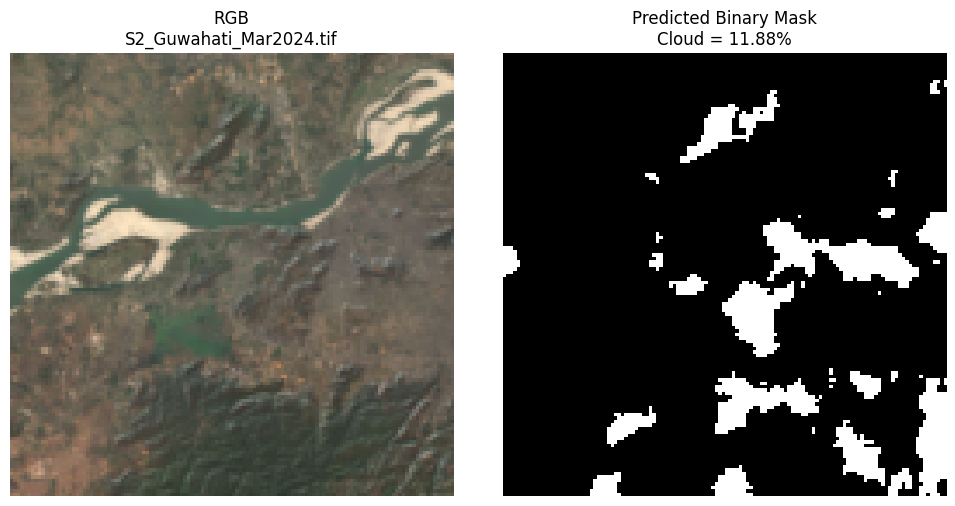


Processing: S2_Guwahati_May2021_B2B3B4B8.tif
Cloud cover = 96.03%


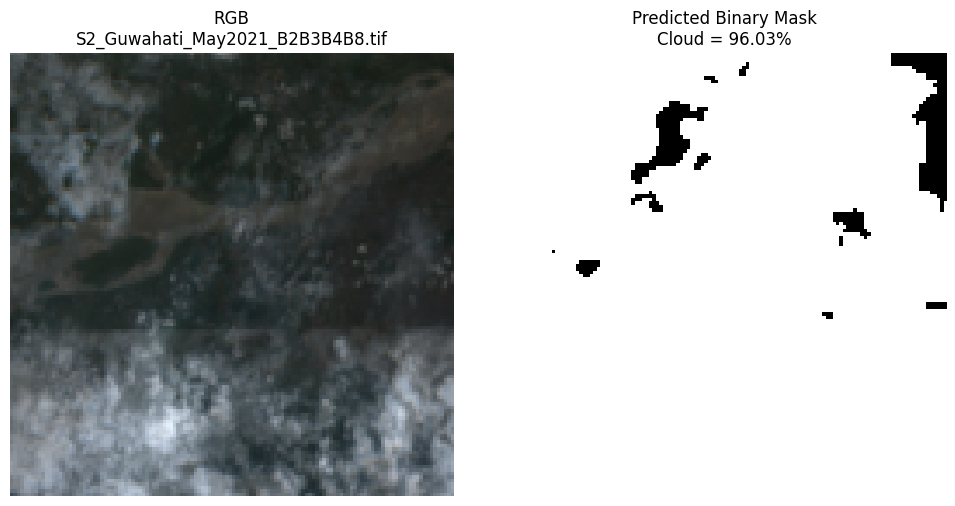


Processing: S2_Guwahati_May2022_B2B3B4B8.tif
Cloud cover = 87.72%


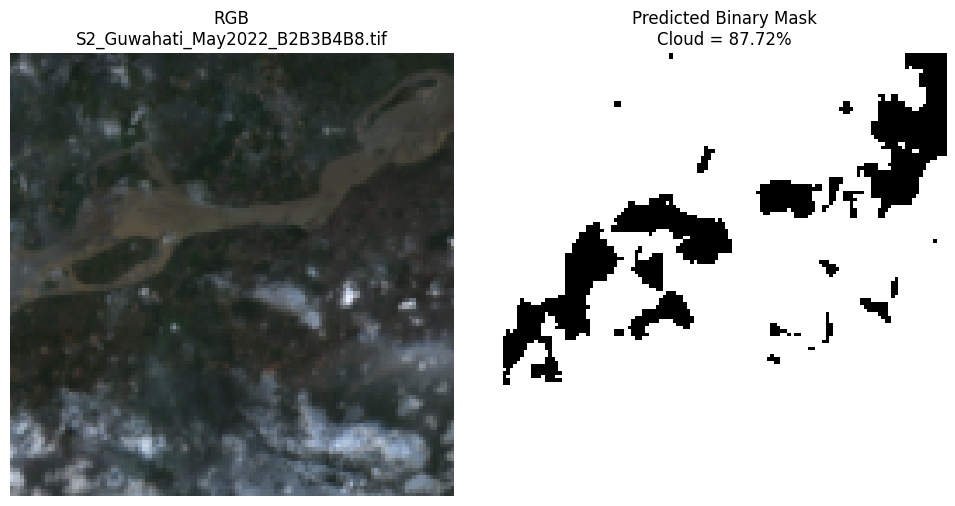


Processing: S2_Guwahati_May2023_B2B3B4B8.tif
Cloud cover = 25.60%


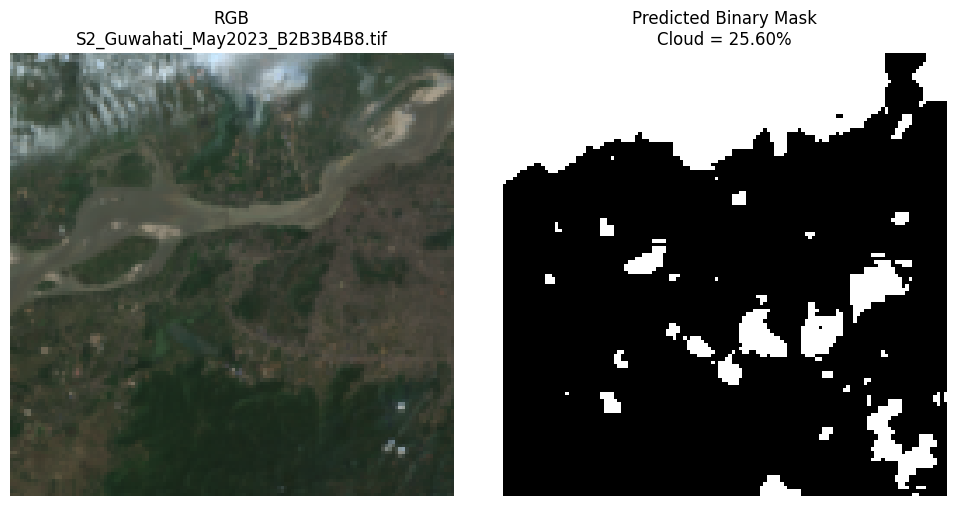


Processing: S2_Guwahati_May2024.tif
Cloud cover = 63.98%


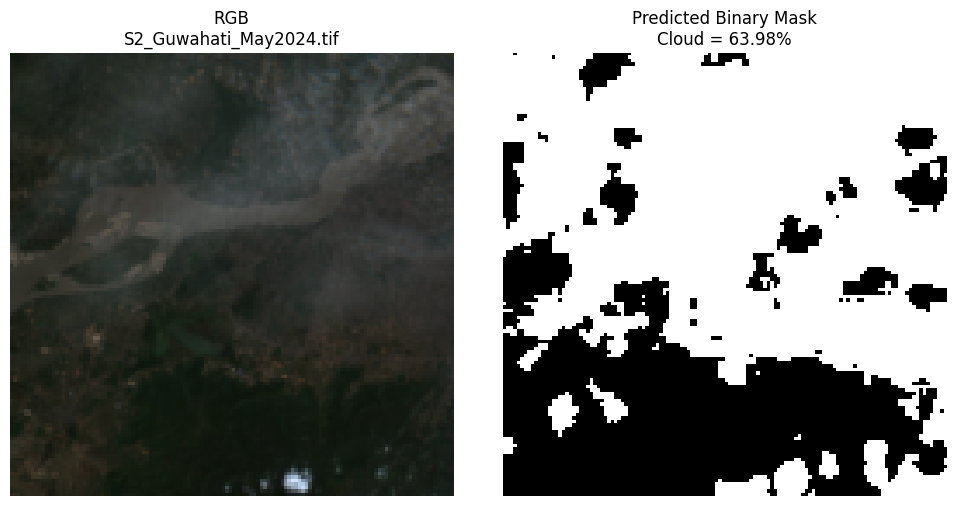


Processing: S2_Guwahati_Nov2021_B2B3B4B8.tif
Cloud cover = 13.51%


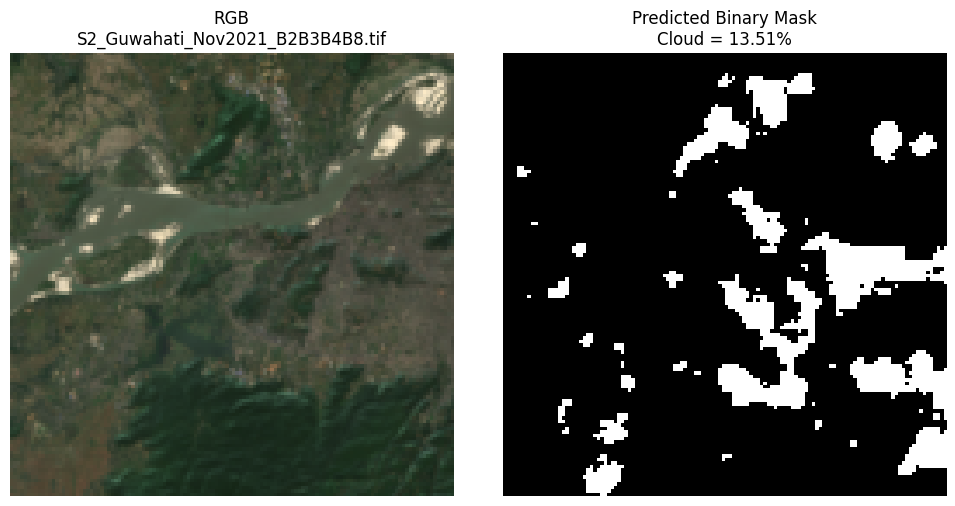


Processing: S2_Guwahati_Nov2022_B2B3B4B8.tif
Cloud cover = 20.50%


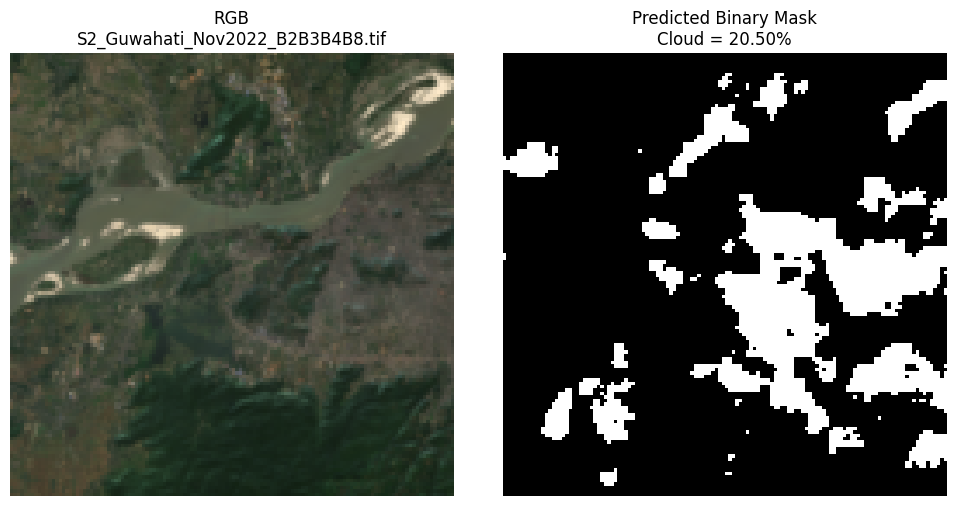


Processing: S2_Guwahati_Nov2023_B2B3B4B8.tif
Cloud cover = 45.84%


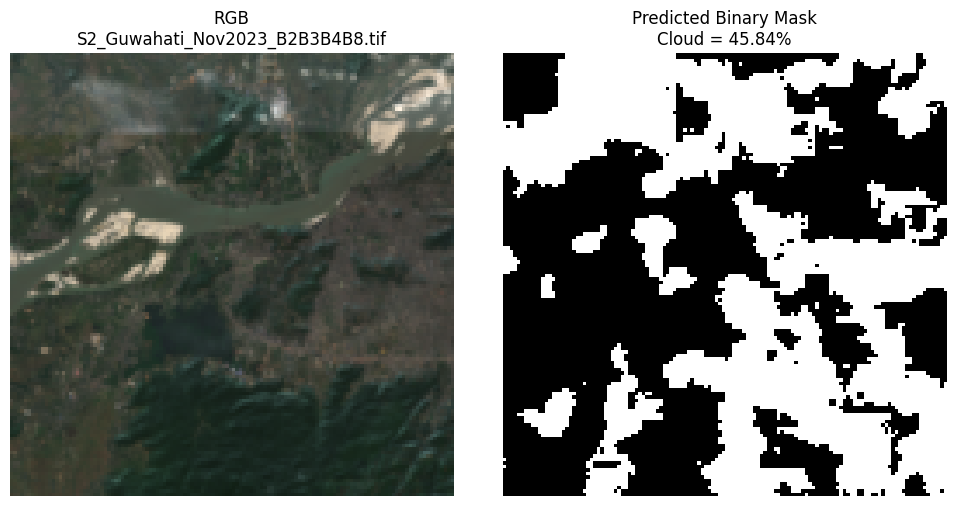


Processing: S2_Guwahati_Nov2024.tif
Cloud cover = 35.84%


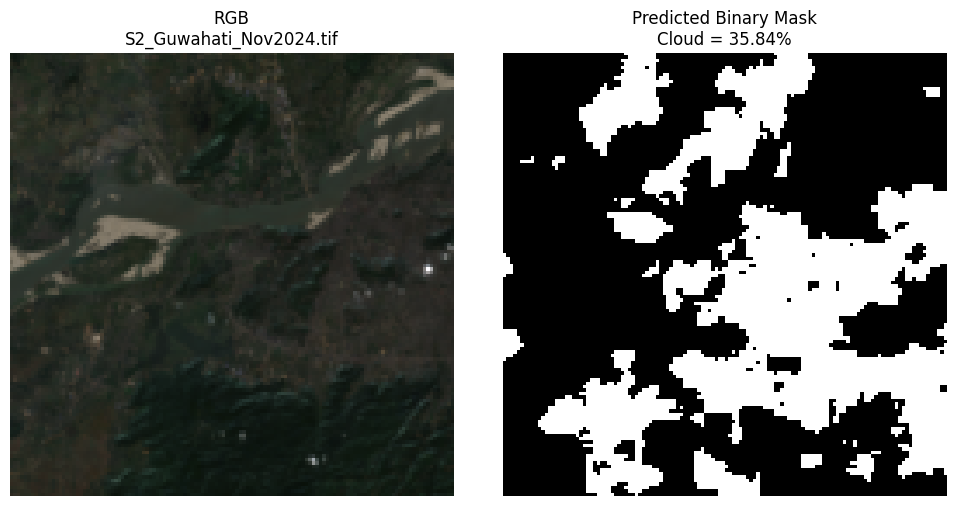


Processing: S2_Guwahati_Oct2021_B2B3B4B8.tif
Cloud cover = 77.85%


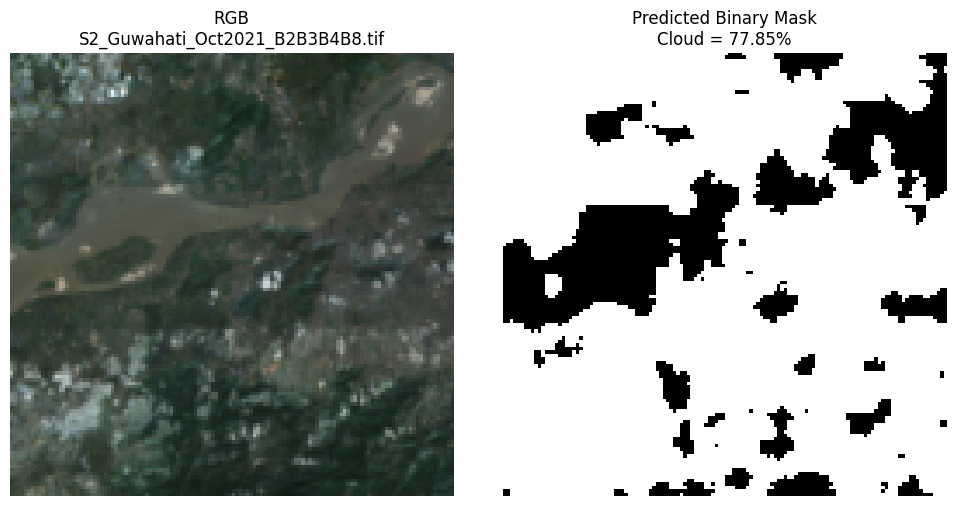


Processing: S2_Guwahati_Oct2022_B2B3B4B8.tif
Cloud cover = 61.30%


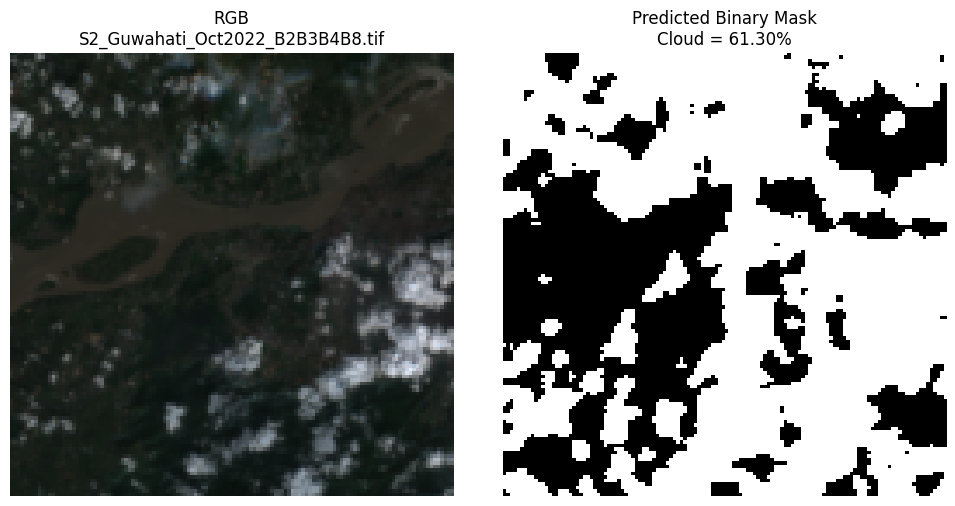


Processing: S2_Guwahati_Oct2023_B2B3B4B8.tif
Cloud cover = 83.87%


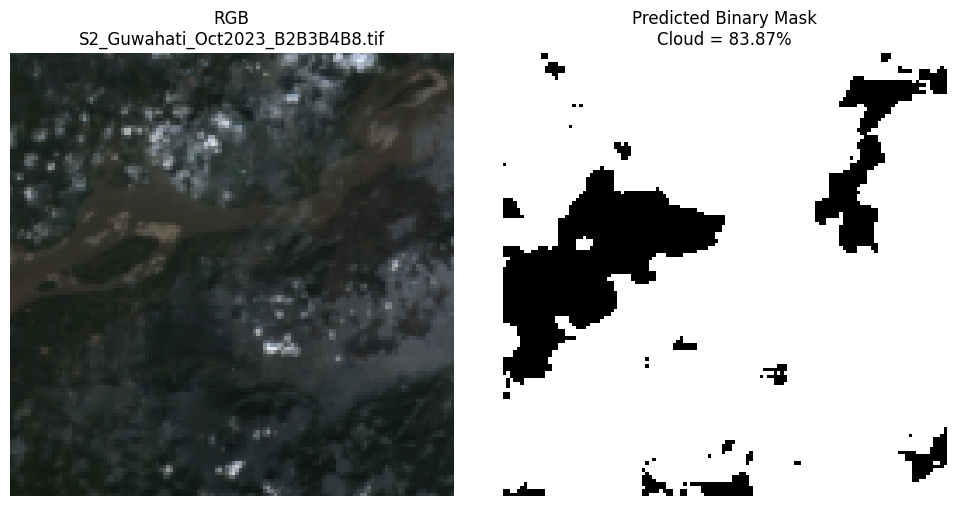


Processing: S2_Guwahati_Oct2024.tif
Cloud cover = 80.25%


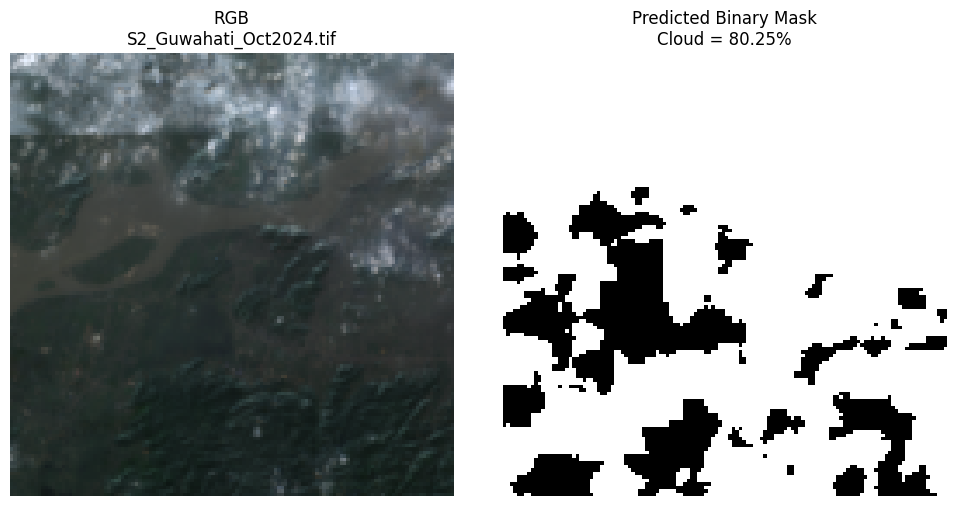


Processing: S2_Guwahati_Sep2021_B2B3B4B8.tif
Cloud cover = 80.43%


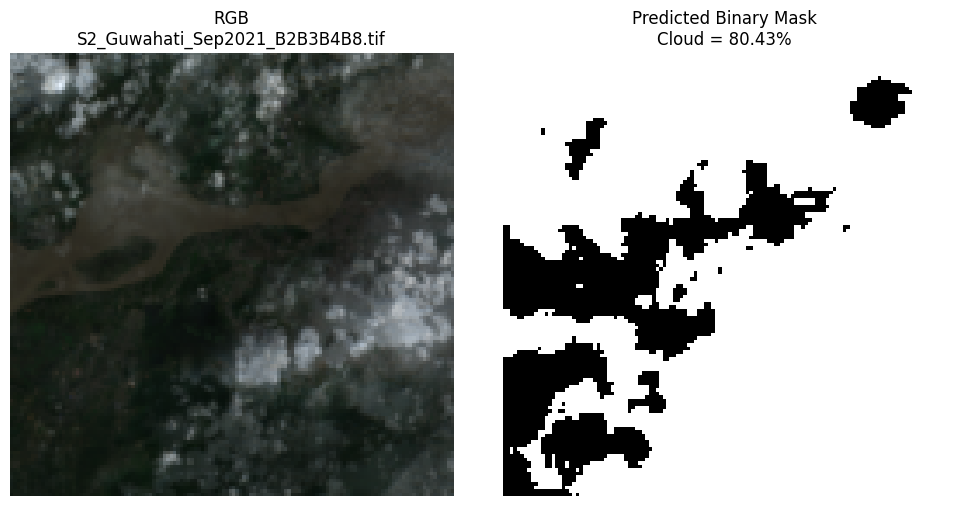


Processing: S2_Guwahati_Sep2022_B2B3B4B8.tif
Cloud cover = 96.49%


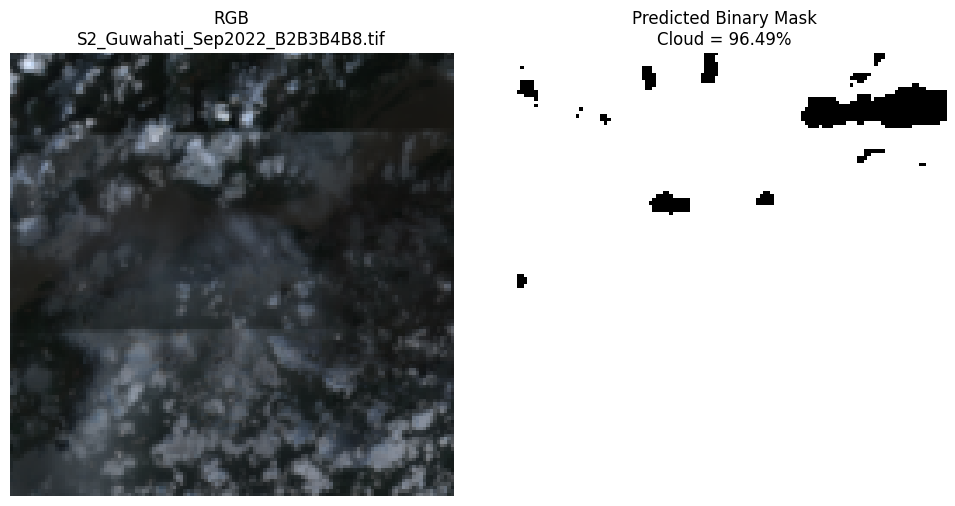


Processing: S2_Guwahati_Sep2023_B2B3B4B8.tif
Cloud cover = 62.07%


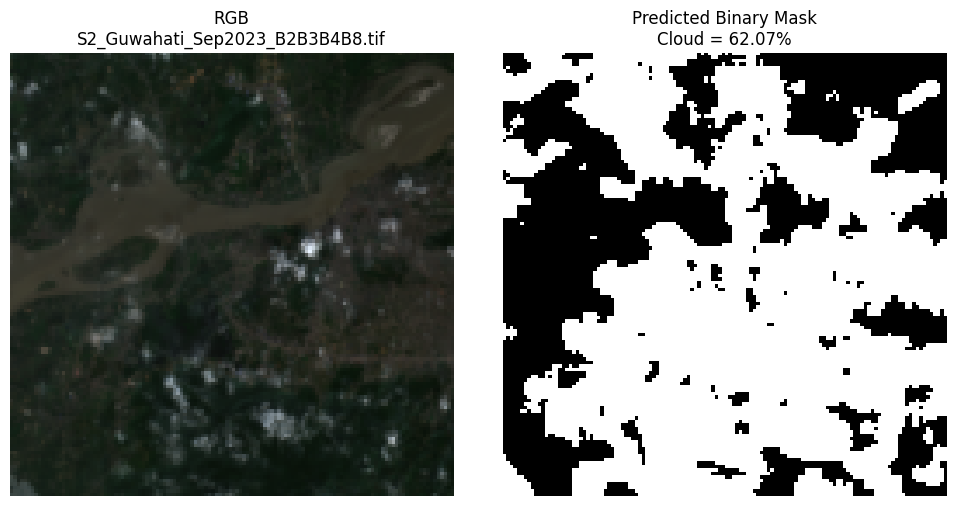


Processing: S2_Guwahati_Sep2024.tif
Cloud cover = 78.96%


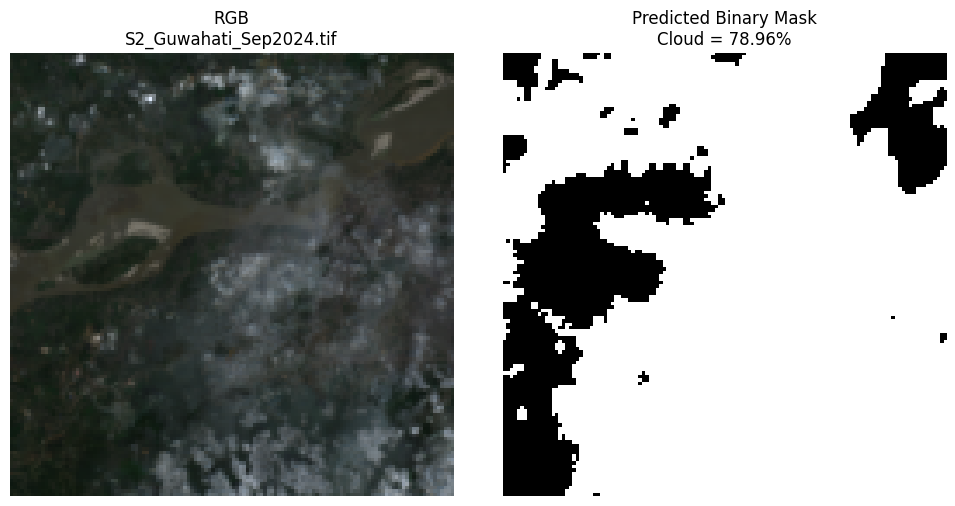

In [29]:
import os
import numpy as np
import rasterio
from rasterio.enums import Resampling
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model


# -------------------------
# CONFIG
# -------------------------
IMG_DIR = r"D:\Documents\AEC\FInal Year Project\guwahati_images_4yearsb2b3b4b8"
MODEL = r"keras_unet_cloud_20epoch_128img.h5"

IMG_SIZE = 128
THRESHOLD = 0.5


# -------------------------
# iou metric (for loading model)
# -------------------------
def iou(y_true, y_pred):
    y_pred = K.clip(y_pred, 0, 1)
    inter = K.sum(y_true * y_pred)
    union = K.sum(y_true + y_pred) - inter
    return (inter + 1e-7) / (union + 1e-7)


# -------------------------
# load model
# -------------------------
model = load_model(MODEL, custom_objects={"iou": iou})
print("Model loaded.")


# -------------------------
# LOOP THROUGH ALL TIF FILES
# -------------------------
for fname in sorted(os.listdir(IMG_DIR)):
    if not fname.lower().endswith(".tif"):
        continue

    path = os.path.join(IMG_DIR, fname)
    print(f"\nProcessing: {fname}")

    # -------- load + resize --------
    with rasterio.open(path) as src:

        B2 = src.read(1, out_shape=(IMG_SIZE, IMG_SIZE),
                      resampling=Resampling.bilinear).astype(np.float32)

        B3 = src.read(2, out_shape=(IMG_SIZE, IMG_SIZE),
                      resampling=Resampling.bilinear).astype(np.float32)

        B4 = src.read(3, out_shape=(IMG_SIZE, IMG_SIZE),
                      resampling=Resampling.bilinear).astype(np.float32)

        B8 = src.read(4, out_shape=(IMG_SIZE, IMG_SIZE),
                      resampling=Resampling.bilinear).astype(np.float32)

    # Sentinel-2 reflectance scale (0–10000)
    X = np.stack([B2, B3, B4, B8], axis=-1).astype(np.float32)
    X = X / 65535.0
    X = np.clip(X, 0, 1)


    # RGB for plotting
    rgb = np.stack([B4, B3, B2], axis=-1)
    rgb /= max(rgb.max(), 1e-6)

    # -------- predict --------
    prob = model.predict(np.expand_dims(X, 0), verbose=0)[0, ..., 0]
    mask = (prob > THRESHOLD).astype(np.uint8)   # binary 0/1 mask

    cloud_percent = mask.mean() * 100
    print(f"Cloud cover = {cloud_percent:.2f}%")

    # -------- visualise --------
    plt.figure(figsize=(10, 5))

    # RGB
    plt.subplot(1, 2, 1)
    plt.imshow(rgb)
    plt.title(f"RGB\n{fname}")
    plt.axis("off")

    # BINARY MASK (black & white)
    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap="gray", vmin=0, vmax=1)
    plt.title(f"Predicted Binary Mask\nCloud = {cloud_percent:.2f}%")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [11]:
print(B2.min(), B2.max())
print(B3.min(), B3.max())
print(B4.min(), B4.max())
print(B8.min(), B8.max())


349.0 6434.0
538.0 6048.0
326.0 5766.0
545.0 5988.0


In [22]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

fp = r"D:\Documents\AEC\FInal Year Project\guwahati_images_4yearsb2b3b4b8\S2_Guwahati_Apr2023_B2B3B4B8.tif"

with rasterio.open(fp) as src:
    B1 = src.read(1).astype(float)
    B2 = src.read(2).astype(float)
    B3 = src.read(3).astype(float)
    B4 = src.read(4).astype(float)

print(B1.mean(), B2.mean(), B3.mean(), B4.mean())


774.8391484940878 991.9161180392188 928.7722452872531 2373.1328002473742


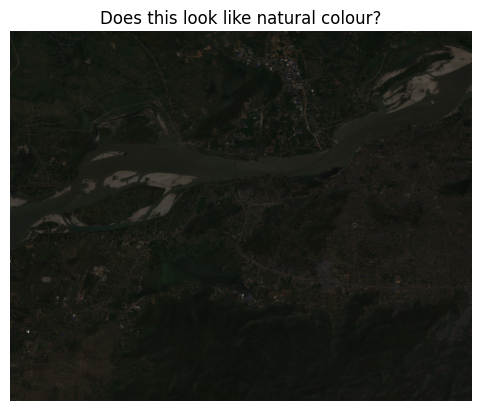

In [25]:
rgb = np.stack([B3, B2, B1], axis=-1)
rgb /= rgb.max()

plt.imshow(rgb)
plt.title("Does this look like natural colour?")
plt.axis("off")
plt.show()


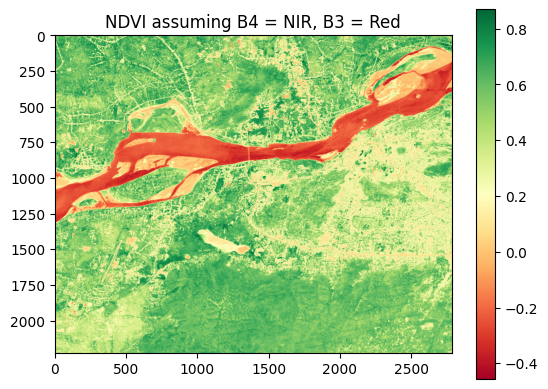

NDVI mean: 0.4065683411354912


In [27]:
ndvi = (B4 - B3) / (B4 + B3 + 1e-6)

plt.imshow(ndvi, cmap="RdYlGn")
plt.colorbar()
plt.title("NDVI assuming B4 = NIR, B3 = Red")
plt.show()

print("NDVI mean:", ndvi.mean())


Model loaded.

Processing: S2_Guwahati_Apr2023_B2B3B4B8.tif


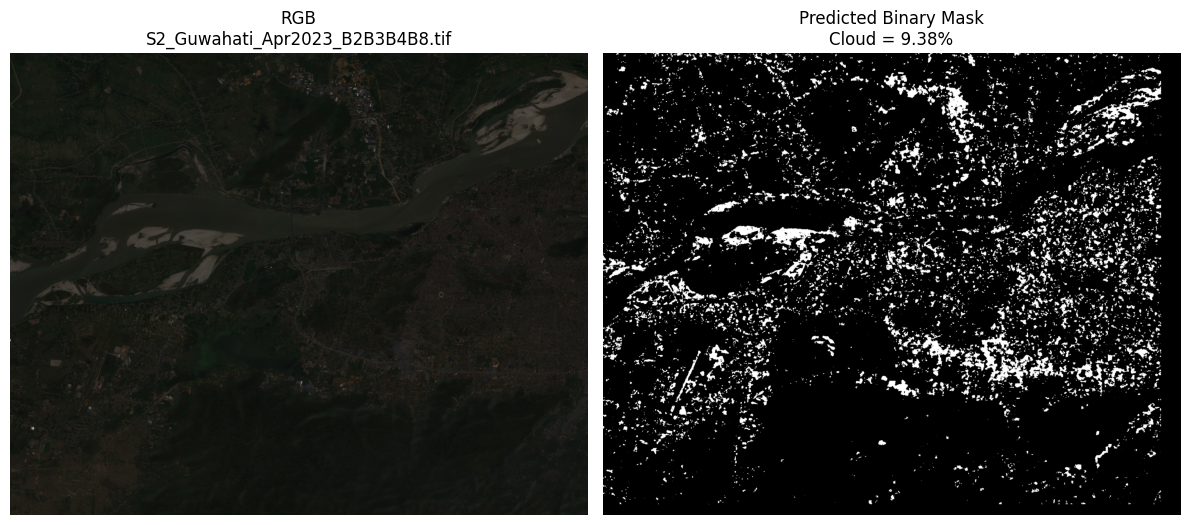


Processing: S2_Guwahati_Apr2024.tif


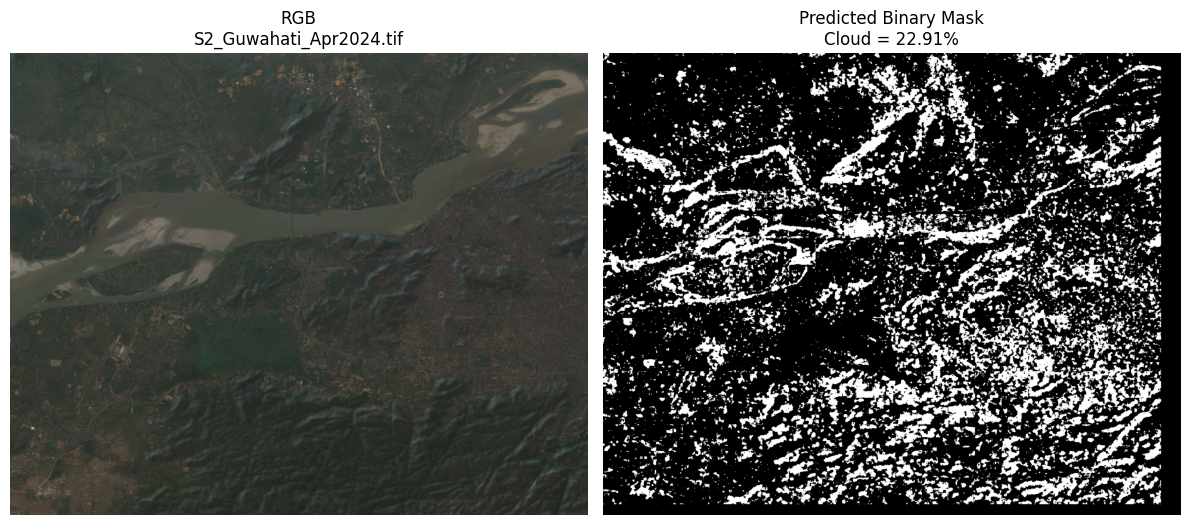


Processing: S2_Guwahati_Aug2021_B2B3B4B8.tif


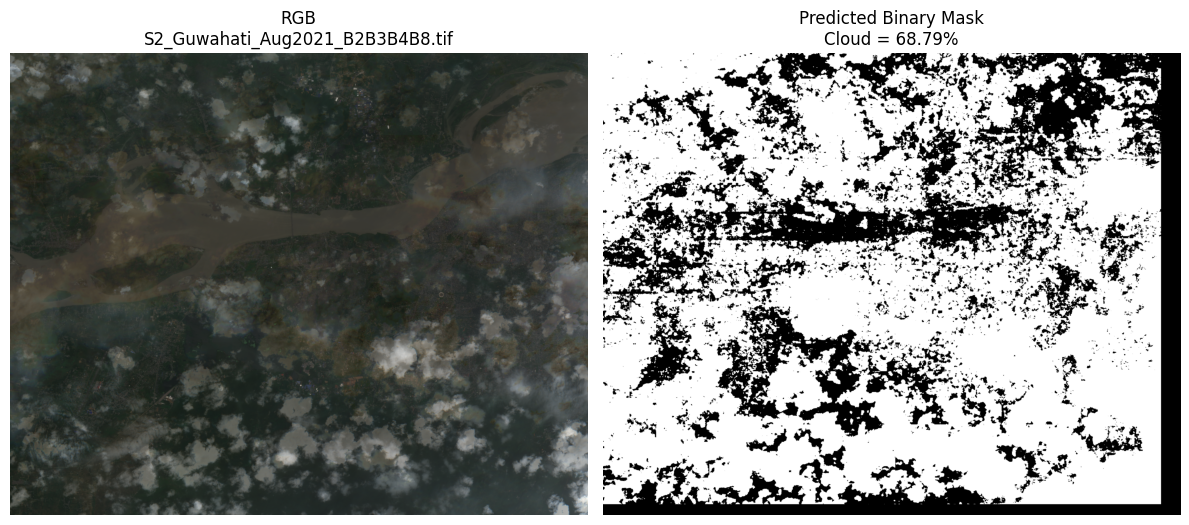


Processing: S2_Guwahati_Aug2022_B2B3B4B8.tif


MemoryError: Unable to allocate 189. MiB for an array with shape (2228, 2784, 4) and data type float64

<Figure size 1200x600 with 2 Axes>


Processing: S2_Guwahati_Aug2023_B2B3B4B8.tif


MemoryError: Unable to allocate 94.6 MiB for an array with shape (2228, 2784, 4) and data type float32

In [31]:
import os
import numpy as np
import rasterio
from rasterio.enums import Resampling
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model

IMG_DIR = r"D:\Documents\AEC\FInal Year Project\guwahati_images_4yearsb2b3b4b8"
MODEL = r"keras_unet_cloud_20epoch_128img.h5"

PATCH = 128
THRESH = 0.5


def iou(y_true, y_pred):
    y_pred = K.clip(y_pred, 0, 1)
    inter = K.sum(y_true * y_pred)
    union = K.sum(y_true + y_pred) - inter
    return (inter + 1e-7) / (union + 1e-7)


model = load_model(MODEL, custom_objects={"iou": iou})

print("Model loaded.")


def norm(x):
    return np.clip(x / 65535.0, 0, 1)


for fname in sorted(os.listdir(IMG_DIR)):
    if not fname.lower().endswith(".tif"):
        continue

    fp = os.path.join(IMG_DIR, fname)
    print("\nProcessing:", fname)

    with rasterio.open(fp) as src:

        B2 = src.read(1).astype(np.float32)
        B3 = src.read(2).astype(np.float32)
        B4 = src.read(3).astype(np.float32)
        B8 = src.read(4).astype(np.float32)

    H, W = B2.shape

    Xfull = norm(np.stack([B2, B3, B4, B8], axis=-1))

    mask_full = np.zeros((H, W), dtype=np.float32)

    for i in range(0, H, PATCH):
        for j in range(0, W, PATCH):

            patch = Xfull[i:i+PATCH, j:j+PATCH, :]

            if patch.shape[0] != PATCH or patch.shape[1] != PATCH:
                continue

            p = model.predict(np.expand_dims(patch, 0), verbose=0)[0, ..., 0]

            mask_full[i:i+PATCH, j:j+PATCH] = p

    mask_bin = (mask_full > THRESH).astype(np.uint8)
    cloud = mask_bin.mean() * 100

    rgb = np.stack([B4, B3, B2], axis=-1)
    rgb = rgb / max(rgb.max(), 1e-6)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(rgb)
    plt.title(f"RGB\n{fname}")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(mask_bin, cmap="gray", vmin=0, vmax=1)
    plt.title(f"Predicted Binary Mask\nCloud = {cloud:.2f}%")
    plt.axis("off")

    plt.tight_layout()
    plt.show()
